In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
import glob

In [7]:
import os

In [8]:
from sklearn.decomposition import PCA

In [9]:
from sklearn.manifold import TSNE

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from sklearn import svm

In [16]:
from sklearn.cluster import KMeans

In [17]:
fruit_images = []

In [18]:
labels = []

In [19]:
for fruit_dir_path in glob.glob("/Users/georgehardy/Desktop/MLPROJ/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        fruit_images.append(image)
        labels.append(fruit_label)
        
fruit_images = np.array(fruit_images)

In [20]:
labels = np.array(labels)
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
id_to_label_dict
label_ids = np.array([label_to_id_dict[x] for x in labels])
scaler = StandardScaler()

In [21]:
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])

In [22]:
pca = PCA(n_components=50)

In [23]:
pca_result = pca.fit_transform(images_scaled)


In [24]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [25]:
def visualize_scatter(data_2d, label_ids, id_to_label_dict=None, figsize=(20,20)):
    if not id_to_label_dict:
        id_to_label_dict = {v:i for i,v in enumerate(np.unique(label_ids))}
    
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    cmap = plt.cm.get_cmap("jet", nb_classes)
    
    for i, label_id in enumerate(np.unique(label_ids)):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    c= cmap(i),
                    linewidth='5',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    #plt.legend(loc='best')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=1, fontsize=figsize[0])

In [28]:
def visualize_scatter_with_images(data_2d, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid()
    artists = []
    for xy, i in zip(data_2d, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(data_2d)
    ax.autoscale()
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

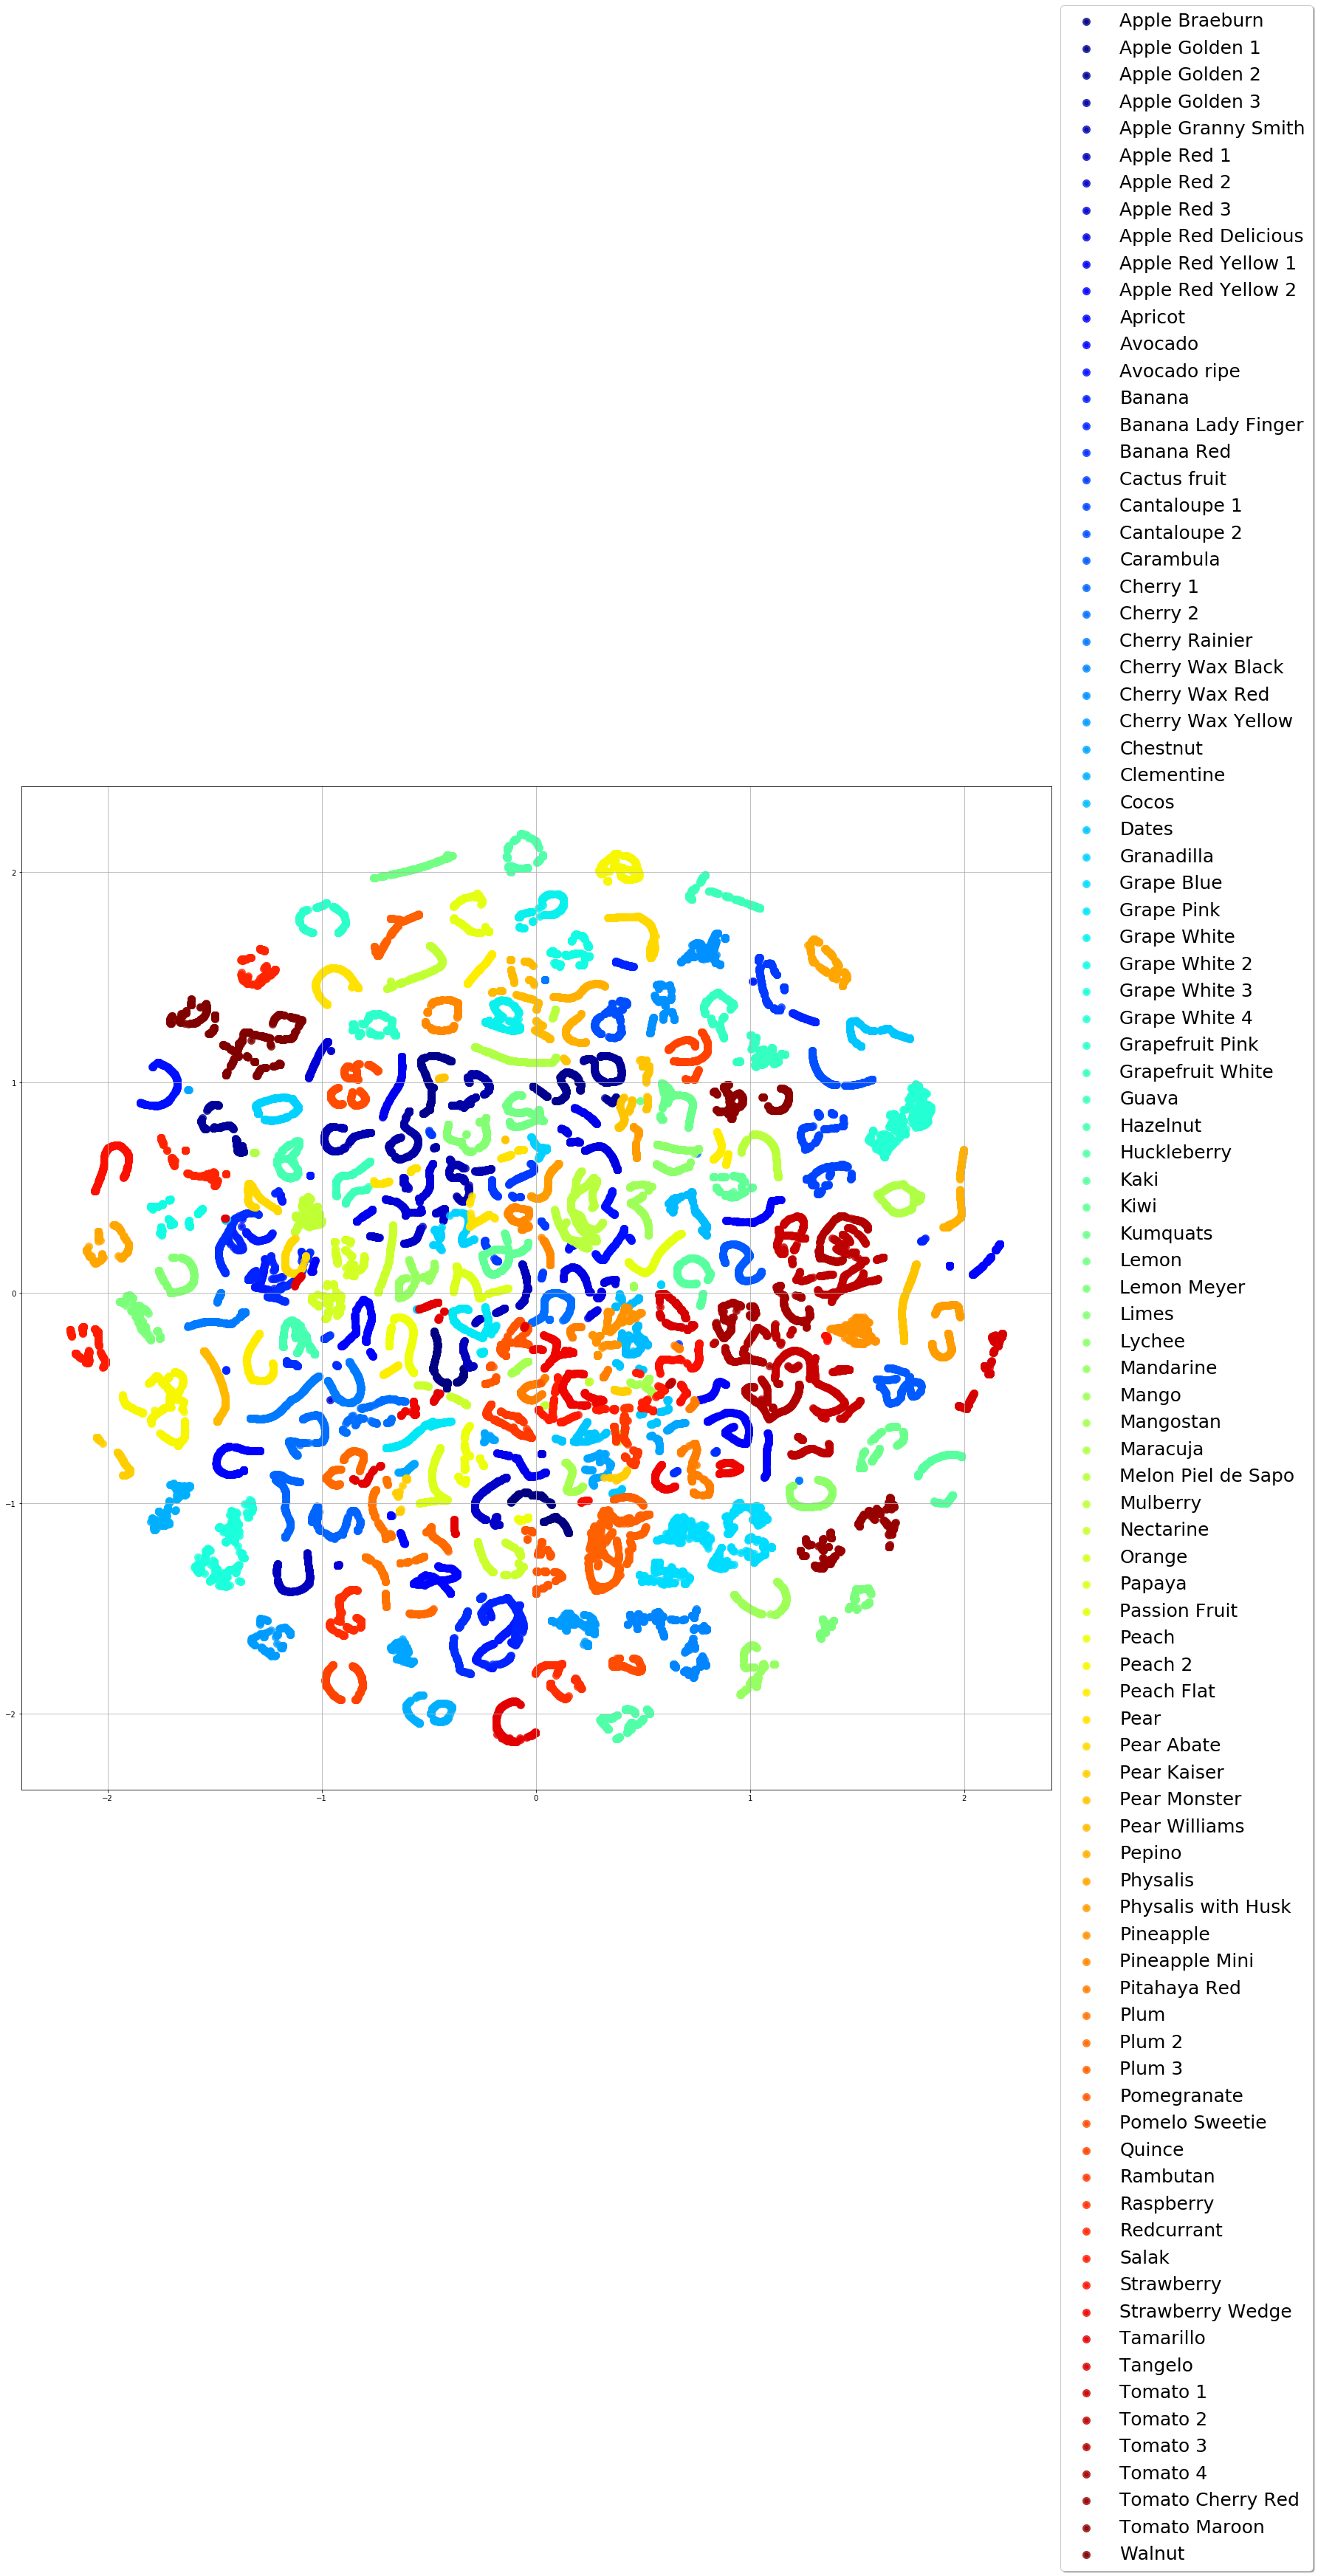

In [29]:
visualize_scatter(tsne_result_scaled, label_ids, id_to_label_dict, figsize=(25, 25))

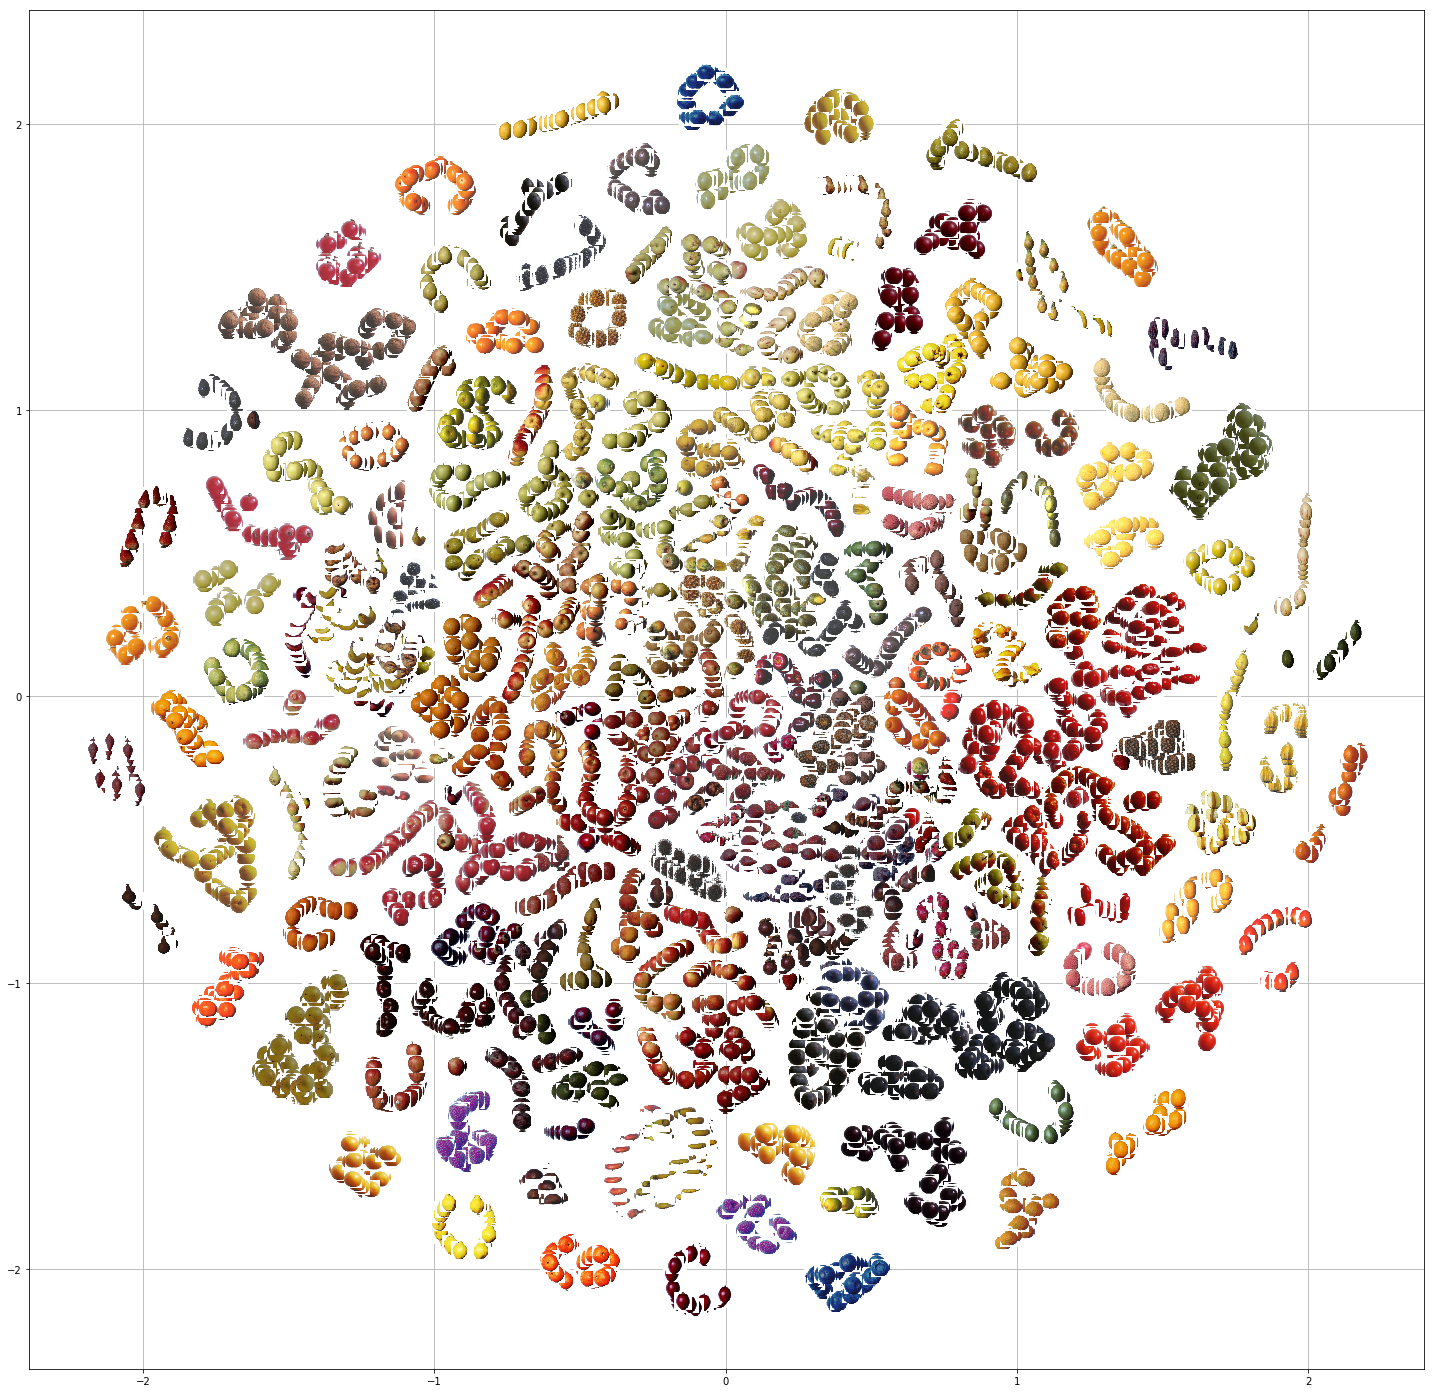

In [30]:
visualize_scatter_with_images(tsne_result_scaled, fruit_images, image_zoom=0.4, figsize=(25, 25))